**Assignment #3** \
Mahima Sachdeva \


1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

    day_name  Pedestrians
0    Tuesday      1394963
1     Monday      1481435
2  Wednesday      1310900
3   Thursday      1370880
4     Friday      1588068


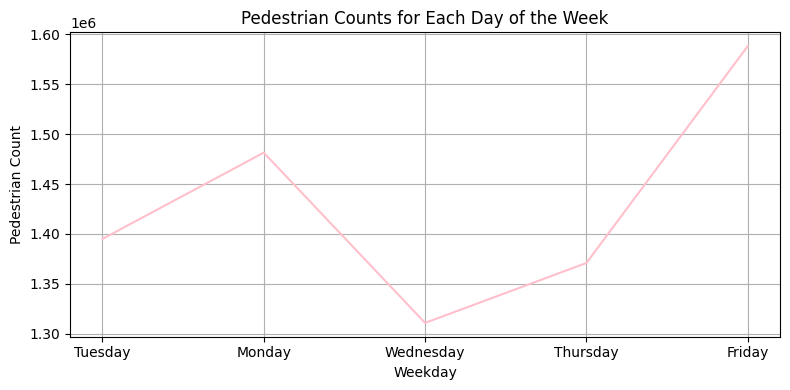

In [ ]:
# Convert hour_beginning to a date/time datatype
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Separate day names into a separate column
df['day_name'] = df['hour_beginning'].dt.day_name()

# Filter to show only weekdays (Monday - Friday)
days = df[['day_name', 'Pedestrians']]
weekdays = days[days['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Group the data by weekday
grouped_weekdays = weekdays.groupby('day_name',sort=False)['Pedestrians'].sum()
grouped_weekdays = grouped_weekdays.reset_index()
print(grouped_weekdays)
# weekdays are sorted in order of how they appear in the data

# Plot line graph that shows the pedestrian counts for each day of the week
plt.figure(figsize=(8, 4))
plt.plot(grouped_weekdays['day_name'], grouped_weekdays['Pedestrians'], color='pink')
plt.title('Pedestrian Counts for Each Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation:** Based on these results, pedestrians were seen to visit the Brooklyn Bridge the most on a Friday, and the least on a Wednesday.

---

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations (with a correlation matrix) between weather patterns and pedestrian counts for the selected year.
- This question requires you to show the relationship between a numerical feature (Pedestrians) and a non-numerical feature (Weather Summary). In such instances we use Encoding. Each weather condition can be encodeed as numbers (0,1,2,...). This technique is called One-Hot Encoding.
- Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless, this way given as a question to help you understand the conecpt better.

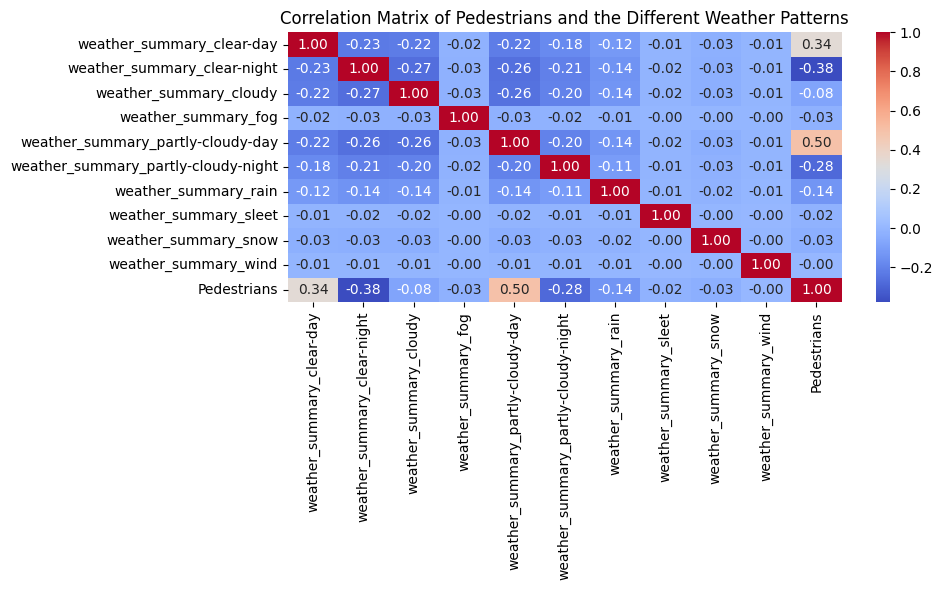

In [ ]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Separate year into a separate column
df['year'] = df['hour_beginning'].dt.year
year = df[['year', 'Pedestrians', 'weather_summary']]

# Filter for only year 2019
year_2019 = year[year['year'] == 2019]

# Perform one-hot encoding (based on web research)
categorical_columns = year_2019.select_dtypes(include=['object']).columns.to_list()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(year_2019[categorical_columns])
one_hot_year_2019 = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
year_2019_encoded = pd.concat([year_2019, one_hot_year_2019], axis=1)
year_2019_encoded = year_2019_encoded.drop(categorical_columns, axis=1)

# Creating a correlation matrix
correlation_matrix = year_2019_encoded[['weather_summary_clear-day', 'weather_summary_clear-night', 'weather_summary_cloudy',
                                         'weather_summary_fog', 'weather_summary_partly-cloudy-day', 'weather_summary_partly-cloudy-night',
                                         'weather_summary_rain', 'weather_summary_sleet', 'weather_summary_snow', 'weather_summary_wind', 'Pedestrians']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and the Different Weather Patterns')
plt.tight_layout()
plt.show()

**Observation:** Based on these results, pedestrians counts had the greatest positive correlation with partly-cloudy weather during the day, and the strongest negative correlation with clear night weather during the night.

---

3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.
- Students can also show plots analyzing activity

  time_of_day  Pedestrians
0     Morning      2518979
1       Night       114314
2     Evening      1596480
3   Afternoon      6803093


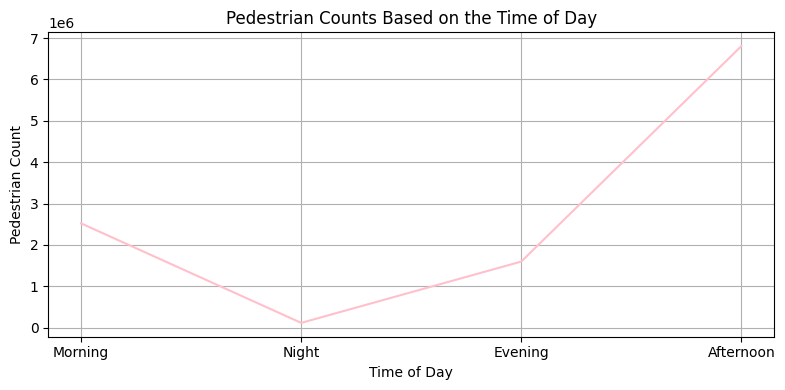

In [ ]:
# Supplement function that categorizes time of day as morning, afternoon, evening, or night
def categorize_time(hour):
    if hour>=00 and hour <12:
        return "Morning"
    elif hour>=12 and hour<18:
        return "Afternoon"
    elif hour>=18 and hour<22:
        return "Evening"
    else:
        return "Night"


# Function that adds column to the dataframe
def add_column_to_dataframe(dataset):
    # separate hour into a separate column
    dataset['hour'] = dataset['hour_beginning'].dt.hour
    # add column containing time of day
    dataset['time_of_day'] = dataset['hour'].apply(categorize_time)

# Group data by time of day
add_column_to_dataframe(df)
grouped_time = df.groupby('time_of_day', sort = False)['Pedestrians'].sum()
grouped_time = grouped_time.reset_index()
# time of day is sorted in order of how they appear in the data
print(grouped_time)

# Plot line graph that shows the pedestrian counts based on the time of day
plt.figure(figsize=(8, 4))
plt.plot(grouped_time['time_of_day'], grouped_time['Pedestrians'], color='pink')
plt.title('Pedestrian Counts Based on the Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:** Based on these results, pedestrians were seen to visit the Brooklyn Bridge the most during the afternoon, and the least during the night.